In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("hotel_booking_data.csv")

In [18]:
df.head().T

,0,1,2,3,4
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel
is_canceled,0,0,0,0,0
lead_time,342,737,7,13,14
arrival_date_year,2015,2015,2015,2015,2015
arrival_date_month,July,July,July,July,July
arrival_date_week_number,27,27,27,27,27
arrival_date_day_of_month,1,1,1,1,1
stays_in_weekend_nights,0,0,0,0,0
stays_in_week_nights,0,0,1,1,2
adults,2,2,1,1,2


In [4]:
df.shape

(119390, 36)

In [5]:
# 1.What are the top 5 most common country codes in the dataset?
df.country.value_counts().head()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
Name: country, dtype: int64

In [15]:
# 2.What is the name of the person who paid the highest ADR (average daily rate)? How much was their ADR?
df.loc[df['adr'].idxmax()]['name']

'Daniel Walter'

In [7]:
# 3.What is the average (mean) number of nights for a stay across the entire data set?
df[['stays_in_week_nights','stays_in_weekend_nights']].mean()

stays_in_week_nights       2.500302
stays_in_weekend_nights    0.927599
dtype: float64

In [8]:
# 4.What is the average total cost for a stay in the dataset?
df['adr'].mean()

101.83112153446686

In [17]:
# 5.What are the names and emails of people who made 5 "Special Requests"?
df.loc[df['total_of_special_requests'] == 5] [['name','email']].T

,7860,11125,14596,14921,14922,24630,27288,27477,29906,29949,...,110083,111909,111911,113915,114770,114909,116455,116457,118817,119161
name,Amanda Harper,Laura Sanders,Tommy Ortiz,Gilbert Miller,Timothy Torres,Jennifer Weaver,Crystal Horton,Brittney Burke,Cynthia Cabrera,Sarah Floyd,...,Charlotte Acevedo,Darrell Brennan,Melinda Jensen,Terry Arnold,Mary Nguyen,Lindsay Cuevas,Cynthia Hernandez,Angela Hawkins,Sue Lawson,Alyssa Richards
email,Amanda.H66@yahoo.com,Sanders_Laura@hotmail.com,Tommy_O@hotmail.com,Miller.Gilbert@aol.com,TTorres@protonmail.com,Jennifer_W@aol.com,Crystal.H@mail.com,Burke_Brittney16@att.com,Cabrera.Cynthia@xfinity.com,Sarah_F@gmail.com,...,Charlotte_A@verizon.com,Brennan_Darrell51@hotmail.com,MelindaJensen@zoho.com,Arnold.Terry@zoho.com,Nguyen.Mary@protonmail.com,Lindsay.Cuevas40@mail.com,CynthiaHernandez@xfinity.com,Angela_H@gmail.com,Sue.L52@comcast.net,Alyssa_Richards@aol.com


0    115580
1      3810
Name: is_repeated_guest, dtype: int64


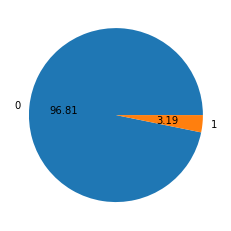

In [10]:
# 6.What percentage of hotel stays were classified as "repeat guests"?
print(df['is_repeated_guest'].value_counts())
plt.pie(x = df['is_repeated_guest'].value_counts(), labels = [0,1], autopct = "%0.2f")
plt.show()

In [11]:
# 7.What are the top 5 most common last name in the dataset?
def last_name(x):
    return (x.split()[-1])

df['Last_Name'] = df['name'].apply(last_name)

df['Last_Name'].value_counts().head(5)

Smith       2503
Johnson     1990
Williams    1618
Jones       1434
Brown       1423
Name: Last_Name, dtype: int64

In [12]:
# 8.What are the names of the people who had booked the most number children and babies for their stay?
df.loc[df[['children','babies']].max()] [['name']]

,name
10,Priscilla Collins PhD
10,Priscilla Collins PhD


In [13]:
# 9.What are the top 3 most common area code in the phone numbers?
def country_code(x):
    return int(x.split("-")[0])

df['country_code'] = df['phone-number'].apply(country_code)

df.country_code.value_counts().head(3)

799    168
185    167
541    166
Name: country_code, dtype: int64

In [14]:
# 10.How many arrivals took place between the 1st and the 15th of the month (inclusive of 1 and 15) ?
len(df.loc[(df['arrival_date_day_of_month'] >= 1) & (df['arrival_date_day_of_month'] <= 15)])

58152